In [12]:
import pandas as pd
import numpy as np


In [13]:
archivo = 'csv_creados/df_infl_tva.csv'
df_infl_tva = pd.read_csv(archivo)

In [14]:
archivo = 'csv_creados/df_infl.csv'
df_infl = pd.read_csv(archivo)

In [15]:
df_infl.head(2) # Datos en términos absolutos

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (2016 = Base Yr),GDP (constant LCU),Velocity of M2
0,1959-12-31,Pesos,0.011898,0.016804,0.020309,0.021351,0.131509,1.448536e-11,NaN,6.475506
1,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.166807,1.707203e-11,1.829320e+11,6.382836


In [16]:
df_infl_tva.head(2) # Datos en términos relativos

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M2_gr
0,1960-12-31,Pesos,0.207364,0.291750,0.286825,0.303500,0.268410,0.178571,NaN,-0.014311
1,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.277738,0.333333,0.054278,0.139587


#### Filtramos columnas ('Año', 'M2', 'CPI', 'GDP(constant)' y 'Velocity of M2')

In [17]:
df_filtrado = df_infl [['Año','M2','CPI (2016 = Base Yr)','GDP (constant LCU)','Velocity of M2']]

In [19]:
df_filtrado = df_filtrado.dropna()

In [20]:
df_filtrado.head(3)

,Año,M2,CPI (2016 = Base Yr),GDP (constant LCU),Velocity of M2
1,1960-12-31,0.026134,1.707203e-11,1.829320e+11,6.382836
2,1961-12-31,0.029302,2.276270e-11,1.928613e+11,7.273797
3,1962-12-31,0.030303,2.897071e-11,1.912181e+11,8.364576


In [23]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 1 to 63
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Año                   63 non-null     datetime64[ns]
 1   M2                    63 non-null     float64       
 2   CPI (2016 = Base Yr)  63 non-null     float64       
 3   GDP (constant LCU)    63 non-null     float64       
 4   Velocity of M2        63 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.0 KB


In [22]:
df_filtrado['Año'] = pd.to_datetime(df_filtrado['Año'])

#### Gráficamos una matriz de correlación para las variables filtradas

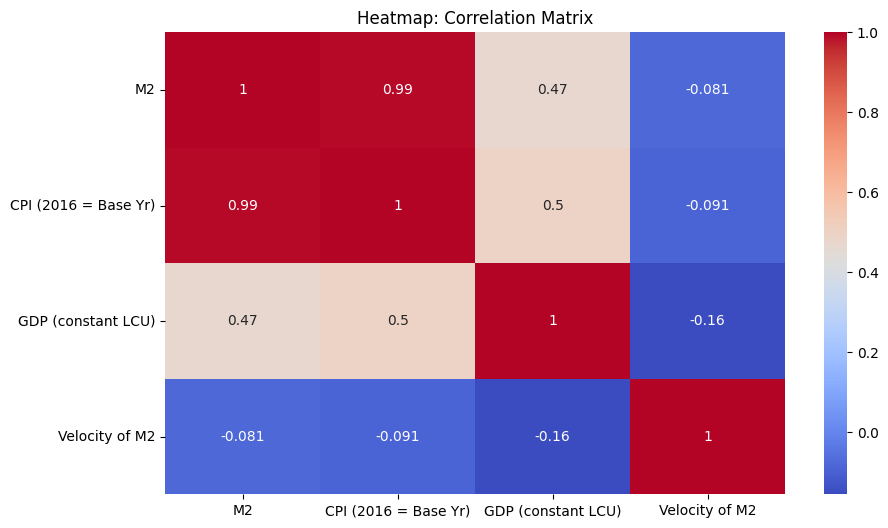

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de calor para las correlaciones entre variables numéricas
numerical_columns = ['M2','CPI (2016 = Base Yr)','GDP (constant LCU)','Velocity of M2']
correlation_matrix = df_filtrado[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()


Se denota una correlacion entre M2 y CPI --> 0.99

La correlación entre el 'CPI' y el 'GDP (constant LCU)' deberia ser negativa, ya que aumentos en la producción son deflaccionarios 'ceteris paribus' --> es importante tener en cuenta el efecto que tienen las demás variables en el CPI (variable que se intenta explicar) --> la mejor opcion es analizarlo en conjunto.


<!-- Año GDP_gr	CPI_gr	Velocity_M2_gr                             # Realtiva
Año GDP (current LCU)	CPI (2016 = Base Yr)	Velocity of M2 # ABS -->

<!-- df_excel = pd.read_excel('Data_in\GDP_Real_Argentina.xls')
df = df.merge(df_excel, on='Año', how='left') -->